# Logistic Regression

## Prerequisites:

To start with Logistic Regression, you must have/know:
- An intuitive understanding of exponential functions and logarithms.
- Familiarity with linear regression.

## Learning Objective: 

- Explain the issues with linear regression for classification.
- Define logistic or sigmoid function.
- Interpret the output of logistic regression.
- Define decision boundary.
- Implement logistic regression in Python with Scikit-learn.
- Evaluate the logistic regression model using several classification metrics.

## Detailed Syllabus:
 
* Classification
  - Issues with using linear regression for classification

*  Logistic Regression
  - Logistic/Sigmoid function
  - Fitting a simple logistic regression model
  - Interpreting the output of logistic regression
  - Decision Boundary 



* Classification Programming: Apply logistic regression skills to a real-world dataset using Scikit-Learn.

## Classification

In the previous unit, you learned about one of the supervised learning tasks called regression where the goal was to predict a continuous real value. In this unit, you will learn about another type of supervised learning task called classification. 

In classification, we predict a **discrete** value or label as opposed to the continuous value predicted by linear regression . **A particular discrete value or label represents a particular class**. Therefore, we are actually predicting which class a sample belongs to based on its features. For example, predicting if a person has a disease or not. Here, having the disease can be represented using a discrete value 1 and not having the disease can be represented using another discrete value of 0. Similarly, here are some other simple examples of the classification problem 
- predicting if an image is of a cat (0) or a dog (1), 
- predicting if a car will get sold (1) or not (0), 
- classifying an email as spam (1) or not (0)
  
There are many machine learning algorithms that can be used to solve a classification problem. Logistic regression is one of them and like many others, you will also start your journey of solving classification problems via logistic regression.  
 



### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Synthetic Dataset

To better understand classification problems and logistic regression, we will start with a simple synthetic example. The example contains the GRE score of the students as a feature $x$ and a corresponding label $y$ with values 1 or 0 indicating the admission of the particular student to a university.
 
Here,
  
* 1 - The student gets admission
 
* 0 - The student does not get admission.
 
We use  [`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) inside  `generate_dataset` function below to generate a dataset with 20 samples. 



In [2]:
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [3]:
dataset = generate_dataset()
dataset.head()

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


Based on the dataset generated above, the task here is to predict if a student gets admission or not given their GRE Score. Even though this is a classification problem with $y$ taking on discrete values (1 and 0), we will first approach this problem using linear regression and discuss if it can predict $y$ given $x$. 

Before moving further, let's plot and see how the data looks.

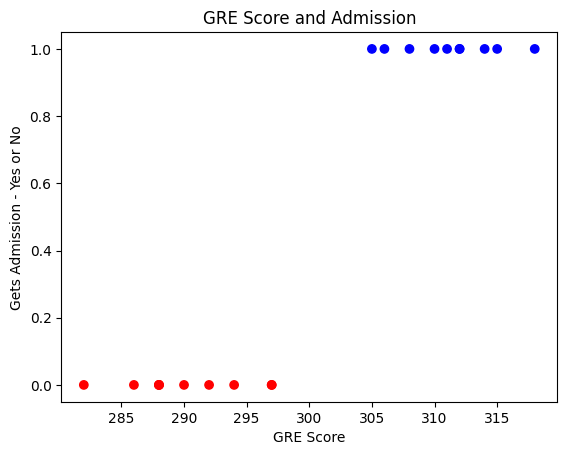

In [4]:
map_color = np.array(['r', 'b'])

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

plt.scatter(dataset.GRE_Score, dataset.Admission, c = map_color[y])

plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')
plt.show()

If you recall, the above scatter plot looks different than that we saw in the Linear Regression unit. There is no upward or downward trend here. This is because here, $y$ is not a continuous value but either 0 or 1. 

Now, let’s fit linear regression using Scikit-Learn's [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and plot the regression line.

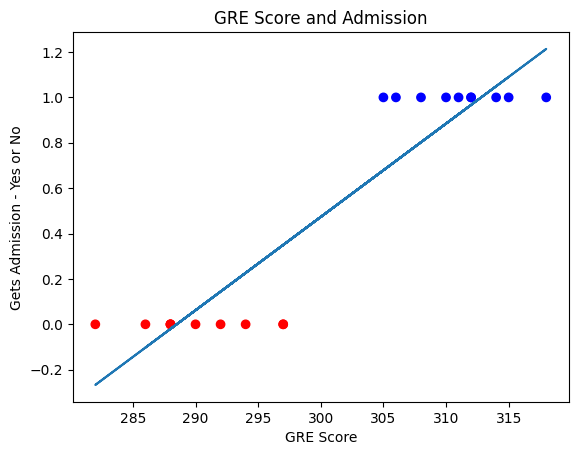

In [5]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

linearRegressor = LinearRegression()
linearRegressor.fit(x, y)

plt.scatter(x, y, c=map_color[y])
plt.plot(x, linearRegressor.predict(x))
plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')

plt.show()

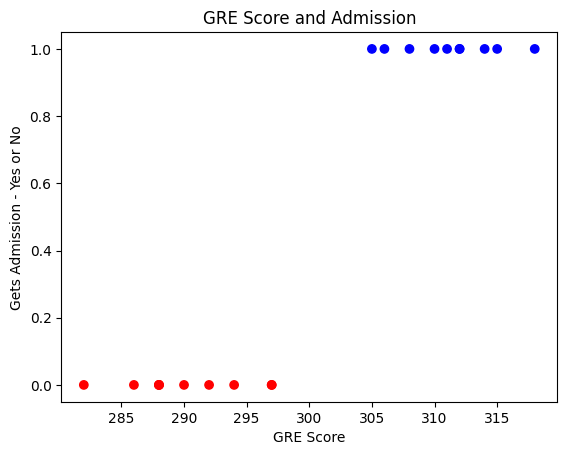

In [25]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

logisticRegressor = LogisticRegression()
logisticRegressor.fit(x, y)

plt.scatter(x, y, c=map_color[y])
# plt.plot(x, logisticRegressor.predict_proba(x)[:,1])
plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')

plt.show()

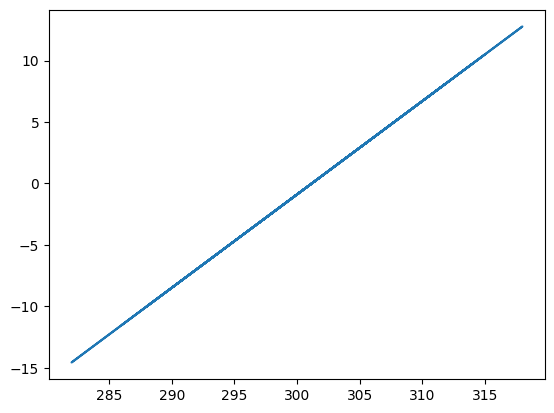

In [27]:
plt.plot(x,(logisticRegressor.coef_[0]*x+logisticRegressor.intercept_))

In [26]:
print(logisticRegressor.coef_,logisticRegressor.intercept_)

[[0.75971626]] [-228.81510413]


In [18]:
X1_min = x.min()
X1_max = x.max()

We can clearly see that the regression line above is not a good fit for our dataset. Can you explain why? A good fit regression line must pass through most of the data points. Also, linear regression predicts a continuous value but all we want is either 0 or 1 or numbers between 0 and 1 (we will come to this later). Thus, linear regression performs poorly when used for classification tasks. 

We will now discuss if any modifications to linear regression (hint: we need to squash all the predicted values between 0 and 1) can help us solve the classification task.

## Logistic Regression




**Let’s recall the equation of simple linear regression from the previous unit.**
 
$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

**In logistic regression, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function**. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$

 
where $z$ is any input real number. We can plot $\sigma(z)$ as follows:

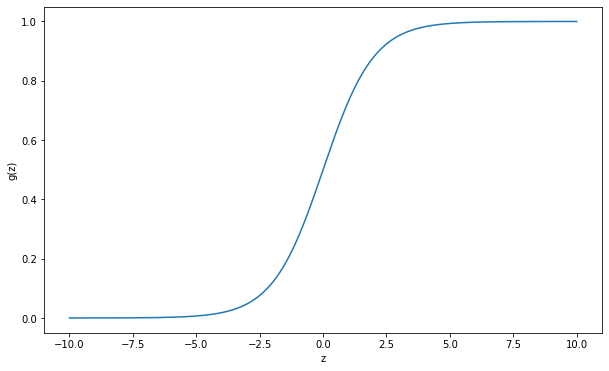

In [ ]:
z = np.linspace(-10, 10, 1000) # An array of 1000 elements

# Sigmoid function
def sigma(z):
  return 1/(1 + np.exp(-z)) 
   
plt.figure(figsize=(10,6))
plt.plot(z, sigma(z)) 
plt.xlabel("z") 
plt.ylabel("g(z)") 
  
plt.show() 

The function $\sigma(z)$, shown above, maps any real number to the [0, 1] interval, making it useful for classification. This function $\sigma(z)$ is sometimes also called the logistic sigmoid function or logistic curve.
 

As mentioned above, $\hat{y}$ is the input to this sigmoid function $\sigma(z)$, which means that $z=\beta_0 + \beta_1 x$. Let the output of the logistic regression for a sample $x$ be $p(x)$. Then $$p(x) = \sigma(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$ 

**The output of logistic regression, $p(x)$ gives us the probability of a sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.**

From the above equations, we can see that we need to estimate the regression coefficients $\beta_0$, $\beta_1$. The discussion of the optimization method used to compute the coefficients is beyond the scope of this chapter. For now, we simply rely on Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to compute the values for us.

### Fitting a simple logistic regression model
 
Let’s understand Logistic Regression better by implementing it on the synthetic dataset we generated earlier. Recall that the model needs to predict whether a student gets admission or not using the GRE score. 
We are going to use Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to solve this classification task. The `LogisticRegression` object has a [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) method for learning the model. 

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Interpreting the output of Logistic Regression





After fitting logistic regression on the data, we can make predictions. The `LogisticRegression` object has a [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) method for predicting the class labels. To demonstrate this, we will use the GRE scores of two students (Jacob and Lacy): 304 and 299 respectively (think of this as the examples belonging to the test set) and predict whether they will get admitted or not.

In [ ]:
class_label_Jacob = logistic_regression.predict([[304]])
print("The predicted class label for Jacob is:", class_label_Jacob)

class_label_Lacy = logistic_regression.predict([[299]])
print("The predicted class label for Lacy is:", class_label_Lacy)

The predicted class label for Jacob is: [1]
The predicted class label for Lacy is: [0]


The model predicted that Jacob will be admitted while Lacy will be rejected admission. Beyond this, we can also obtain the probabilities of getting admitted or rejected. For this, we can use [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) method. 

In [ ]:
probability_Jacob = logistic_regression.predict_proba([[304]])
print("The probabilites for Jacob is:", probability_Jacob)

probability_Lacy = logistic_regression.predict_proba([[299]])
print("The probabilites for Lacy is:", probability_Lacy)

The probabilites for Jacob is: [[0.10539771 0.89460229]]
The probabilites for Lacy is: [[0.84023034 0.15976966]]


We can see that Jacob has an $89.46\%$ chance of getting admitted while a $10.53\%$ chance of getting rejected. Similarly, Lacy has a $15.97\%$ chance of getting admitted while $84.02\%$ chance of getting rejected.

To summarize: we can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) method to directly get the class labels while  [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) method is to get the probabilities ordered by the label of the classes *i.e.* $[P(y=0)$,$ P(y=1)]$. 

### Decision Boundary
 
Beyond class labels and probabilities, another thing that logistic regression gives us is the decision boundary. **Decision boundary is a hypersurface that separates the region where y = 0 and y = 1**. 
 
Visualizing decision boundary in two dimensions will be easier and more intuitive. So, we will use the same student classification example but with one more feature added. Let’s add a feature called CGPA. It is the cumulative GPA of students over all the subjects.
 
As earlier, `generate_dataset_2d` function generates a dataset of 20 examples with 2 features.

In [ ]:
def generate_dataset_2d():
  dataset = make_classification(n_samples=20, n_features=2, n_repeated=0, n_redundant=0,  shift=[31,2.6], 
                                scale=[10, 3], n_classes=2, n_clusters_per_class=1, n_informative=2, 
                                class_sep=0.9, random_state=10)

  y = pd.DataFrame(dataset[1])
  y = np.where(y > 0.5, 0, 1)
  y = pd.DataFrame(y)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(df), y], axis=1)
  df.columns = ['GRE_Score', 'CGPA', 'Admission']
  df.GRE_Score = np.ceil(df.GRE_Score).astype(int)
  df.CGPA = np.around(df.CGPA,1)
  return df
  # print(dataset[1],y)

Let's take a look at the dataset.

In [ ]:
dataset = generate_dataset_2d()
dataset.head()

,GRE_Score,CGPA,Admission
0,313,7.2,1
1,312,7.5,1
2,295,3.3,0
3,325,3.3,1
4,299,4.0,0


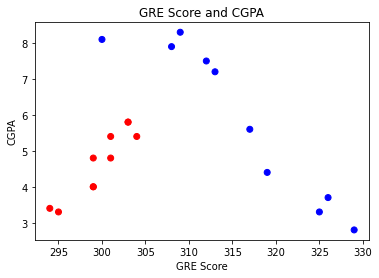

In [ ]:
map_color = np.array(['r', 'b'])

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

plt.scatter( dataset.GRE_Score, dataset.CGPA, c = map_color[y])

plt.title('GRE Score and CGPA')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

Let’s fit the logistic regression on this dataset and see the decision boundary. We will use the same `LogisticRegression` object to fit logistic regression on our new data. Then we will visualize the decision boundary.
 
*Don't worry about the code used for the visualization part. All you need to know about it is that it displays the decision boundary.*
 



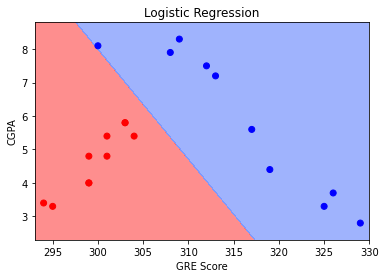

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X,y)

# Creating a meshgrid of GRE score and CGPA
X1_min = X[:, 0].min()
X1_max = X[:, 0].max()

X2_min = X[:, 1].min()
X2_max = X[:, 1].max()

X1_mesh, X2_mesh = np.meshgrid(np.arange(X1_min - 1, X1_max +1, 0.01), 
                               np.arange(X2_min - 1, X2_max + 1, 0.01))

# Classifying each point in meshgrid
input_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T # all points in meshgrid as input
label_mesh = logistic_regression.predict(input_mesh) # labels for all points in meshgrid

# Plotting the decision boundary for entire mesh
from matplotlib.colors import ListedColormap
plt.contourf(X1_mesh, X2_mesh, label_mesh.reshape(X1_mesh.shape),  alpha = 0.75, cmap = ListedColormap(('#FE6969', '#7F9AFD')))


# Plotting the data points
plt.scatter(X[:,0], X[:,1], c=y, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1_min - 1, X1_max + 1)
plt.ylim(X2_min - 0.5, X2_max + 0.5)

# Titles and labels
plt.title('Logistic Regression')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()


**In this example, the straight line which separates the red region where y = 0 and the blue region where y = 1 is called the decision boundary.** 

## Additional Resources

* Books 
  *  Aurélien Géron (2017), Hands-On Machine Learning with Scikit-Learn and TensorFlow, 1st edition, O'Reilly
    * Part I, Chapter 4 Training Models, page 134-137 to learn about implementation of Logistic Regression in greater detail

